In [33]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import lxml
import numpy as np

from linearmodels.panel import PanelOLS
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# All OLS




In [42]:
#decide which df to use
df = pd.read_csv("Dataframes/economic_story_regression.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]
df = df.drop(["Earnings Per Share - Actual Surprise"], axis=1)
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5),Recommendation change,...,Price Target - Standard Deviation,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,AVY.N,2013-01-01,11.178,Materials,3.625620,3.426001e+09,1.532200e+09,7.0,3.00000,0.00000,...,2.44949,0.799347,10.637479,207295.0,-1,22.538500,0.166000,0.359537,76.666667,7.733333
1,AVY.N,2013-04-01,2.482,Materials,2.046169,4.309428e+09,1.498900e+09,7.0,2.87500,-0.12500,...,3.92272,0.895787,24.148726,0.0,-1,23.468125,0.143750,0.360572,81.666667,7.533333
2,AVY.N,2013-07-01,1.068,Materials,1.551601,4.258229e+09,1.552300e+09,8.0,2.87500,0.00000,...,4.30946,0.906078,-0.054218,0.0,-1,24.099219,0.125625,0.463789,81.566667,7.233333
3,AVY.N,2013-10-01,8.095,Materials,2.775994,4.273414e+09,1.504900e+09,7.0,2.62500,-0.25000,...,3.45230,0.903176,2.467620,236291.0,-1,19.740938,0.125806,0.441854,76.933333,6.933333
4,AVY.N,2014-01-01,1.471,Materials,3.204412,4.877168e+09,1.583900e+09,8.0,2.33333,-0.29167,...,3.42555,0.920659,16.003852,157761.0,-1,19.563770,0.126230,0.465460,80.933333,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,POOL.OQ,2021-10-01,17.194,Retailing,2.836295,1.742020e+10,1.411448e+09,8.0,2.30000,0.00000,...,50.48823,3.684400,-5.130322,157740.0,-1,43.036308,0.140755,0.382645,69.900000,4.200000
19197,POOL.OQ,2022-01-01,40.267,Retailing,3.269867,2.268979e+10,1.035557e+09,8.0,2.30000,0.00000,...,41.33833,4.504382,30.489705,82349.0,-1,52.695806,0.467234,0.380946,63.133333,3.800000
19198,POOL.OQ,2022-04-01,34.342,Retailing,6.630736,1.696712e+10,1.412650e+09,9.0,2.00000,-0.30000,...,37.49206,3.422880,-25.160664,290897.0,-1,50.457581,1.394118,0.495588,57.866667,3.600000
19199,POOL.OQ,2022-07-01,1.503,Retailing,3.625249,1.405795e+10,2.055818e+09,9.0,2.20000,0.20000,...,57.57373,2.749481,-21.661570,185584.0,-1,49.861562,2.885882,0.423045,56.100000,3.566667


#### OLS Regression

# Rescaling the variables

In [44]:
n = 2
rescale = df.iloc[:, n:].copy()

scaler = MinMaxScaler()

for col in rescale.columns:
    if rescale[col].dtype != "object":
        rescale[col] = scaler.fit_transform(rescale[col].values.reshape(-1, 1))

rescale

,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5),Recommendation change,Recommendation - Mean (1-5).1,Price Target - Standard Deviation,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,0.022195,Materials,0.385569,0.001166,0.065123,0.125000,0.742857,0.538462,0.666667,0.002079,0.027195,0.298034,0.001183,0.0,0.058434,0.015981,0.552998,0.480156,0.443262
1,0.004928,Materials,0.384977,0.001471,0.064917,0.125000,0.696428,0.480770,0.666667,0.003330,0.027308,0.340793,0.000000,0.0,0.069092,0.010593,0.555632,0.596887,0.421986
2,0.002121,Materials,0.384792,0.001453,0.065247,0.145833,0.696428,0.538462,0.625000,0.003658,0.027321,0.264198,0.000000,0.0,0.076327,0.006205,0.818318,0.594553,0.390071
3,0.016074,Materials,0.385251,0.001459,0.064955,0.125000,0.603571,0.423078,0.625000,0.002930,0.027317,0.272179,0.001348,0.0,0.026361,0.006249,0.762495,0.486381,0.358156
4,0.002921,Materials,0.385411,0.001667,0.065443,0.145833,0.495236,0.403846,0.541667,0.002908,0.027338,0.315017,0.000900,0.0,0.024330,0.006351,0.822572,0.579767,0.329787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,0.034141,Retailing,0.385273,0.006004,0.064377,0.145833,0.482857,0.538462,0.433333,0.042855,0.030598,0.248134,0.000900,0.0,0.293433,0.009868,0.611807,0.322179,0.067376
19197,0.079955,Retailing,0.385436,0.007826,0.062055,0.145833,0.482857,0.538462,0.433333,0.035088,0.031566,0.360861,0.000470,0.0,0.404175,0.088919,0.607483,0.164202,0.024823
19198,0.068190,Retailing,0.386695,0.005848,0.064385,0.166667,0.371428,0.400001,0.433333,0.031824,0.030290,0.184744,0.001660,0.0,0.378514,0.313346,0.899246,0.041245,0.003546
19199,0.002984,Retailing,0.385569,0.004842,0.068358,0.166667,0.445714,0.630770,0.333333,0.048869,0.029495,0.195817,0.001059,0.0,0.371681,0.674548,0.714626,0.000000,0.000000


In [45]:
rescale = pd.concat([df.iloc[:,:n], rescale], axis=1)
rescale

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5),Recommendation change,...,Price Target - Standard Deviation,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,AVY.N,2013-01-01,0.022195,Materials,0.385569,0.001166,0.065123,0.125000,0.742857,0.538462,...,0.002079,0.027195,0.298034,0.001183,0.0,0.058434,0.015981,0.552998,0.480156,0.443262
1,AVY.N,2013-04-01,0.004928,Materials,0.384977,0.001471,0.064917,0.125000,0.696428,0.480770,...,0.003330,0.027308,0.340793,0.000000,0.0,0.069092,0.010593,0.555632,0.596887,0.421986
2,AVY.N,2013-07-01,0.002121,Materials,0.384792,0.001453,0.065247,0.145833,0.696428,0.538462,...,0.003658,0.027321,0.264198,0.000000,0.0,0.076327,0.006205,0.818318,0.594553,0.390071
3,AVY.N,2013-10-01,0.016074,Materials,0.385251,0.001459,0.064955,0.125000,0.603571,0.423078,...,0.002930,0.027317,0.272179,0.001348,0.0,0.026361,0.006249,0.762495,0.486381,0.358156
4,AVY.N,2014-01-01,0.002921,Materials,0.385411,0.001667,0.065443,0.145833,0.495236,0.403846,...,0.002908,0.027338,0.315017,0.000900,0.0,0.024330,0.006351,0.822572,0.579767,0.329787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,POOL.OQ,2021-10-01,0.034141,Retailing,0.385273,0.006004,0.064377,0.145833,0.482857,0.538462,...,0.042855,0.030598,0.248134,0.000900,0.0,0.293433,0.009868,0.611807,0.322179,0.067376
19197,POOL.OQ,2022-01-01,0.079955,Retailing,0.385436,0.007826,0.062055,0.145833,0.482857,0.538462,...,0.035088,0.031566,0.360861,0.000470,0.0,0.404175,0.088919,0.607483,0.164202,0.024823
19198,POOL.OQ,2022-04-01,0.068190,Retailing,0.386695,0.005848,0.064385,0.166667,0.371428,0.400001,...,0.031824,0.030290,0.184744,0.001660,0.0,0.378514,0.313346,0.899246,0.041245,0.003546
19199,POOL.OQ,2022-07-01,0.002984,Retailing,0.385569,0.004842,0.068358,0.166667,0.445714,0.630770,...,0.048869,0.029495,0.195817,0.001059,0.0,0.371681,0.674548,0.714626,0.000000,0.000000


## Check the correlation with rescaled values

C:\Users\alexa\AppData\Local\Temp\ipykernel_18808\2670317210.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = for_cm.corr()


<AxesSubplot: >

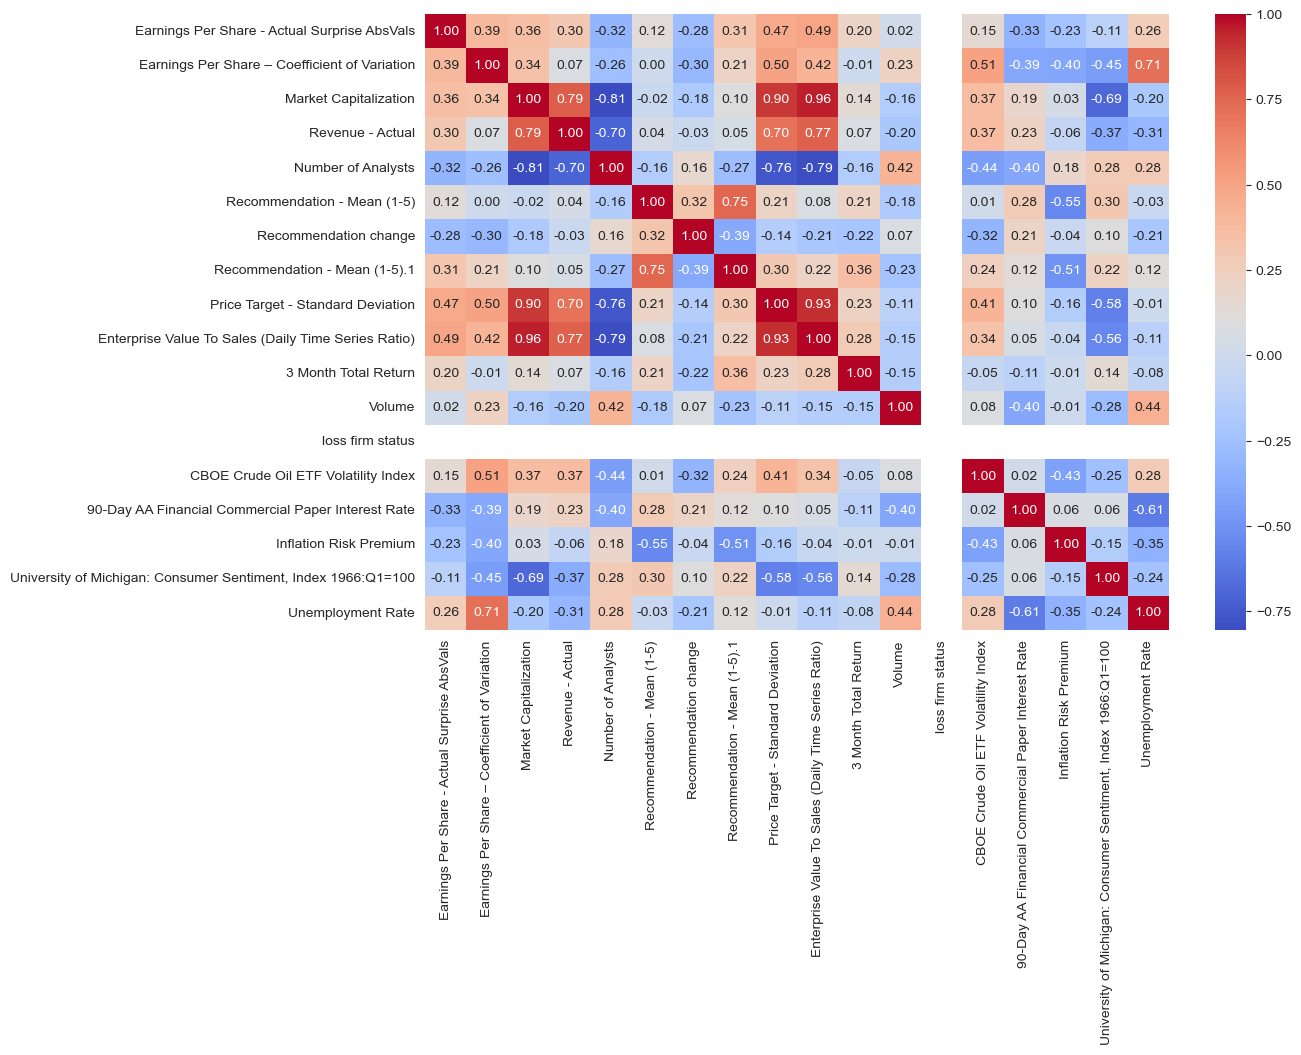

In [46]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_cm = rescale[rescale['Instrument'] == 'AAPL.OQ']
#.iloc[0:38, :]


# print the reversed DataFrame
for_cm

corr_matrix = for_cm.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [47]:
rescale = rescale.dropna()
y = rescale["Earnings Per Share - Actual Surprise AbsVals"]
#X = df_accuracy_new[['Revenue - Actual', 'Net Income after Tax']]
X = rescale.iloc[:, 4:]
#X = rescale[X_var_names]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Earnings Per Share - Actual Surprise AbsVals   R-squared:                       0.054
Model:                                                      OLS   Adj. R-squared:                  0.054
Method:                                           Least Squares   F-statistic:                     65.19
Date:                                          Mon, 06 Mar 2023   Prob (F-statistic):          8.55e-206
Time:                                                  21:51:12   Log-Likelihood:                 22362.
No. Observations:                                         18117   AIC:                        -4.469e+04
Df Residuals:                                             18100   BIC:                        -4.456e+04
Df Model:                                                    16                                         
Covariance Type:                                      nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -0.1233      0.017     -7.155      0.000      -0.157      -0.090
Earnings Per Share – Coefficient of Variation                     0.4531      0.043     10.475      0.000       0.368       0.538
Market Capitalization                                            -0.0190      0.017     -1.090      0.276      -0.053       0.015
Revenue - Actual                                                 -0.0141      0.009     -1.590      0.112      -0.032       0.003
Number of Analysts                                               -0.0354      0.004     -9.338      0.000      -0.043      -0.028
Recommendation - Mean (1-5)                                       0.0084      0.005      1.818      0.069      -0.001       0.018
Recommendation change                                            -0.0305      0.007     -4.435      0.000      -0.044      -0.017
Recommendation - Mean (1-5).1                                    -0.0183      0.005     -3.860      0.000      -0.028      -0.009
Price Target - Standard Deviation                                -0.0053      0.025     -0.213      0.831      -0.054       0.043
Enterprise Value To Sales (Daily Time Series Ratio)               0.1845      0.045      4.074      0.000       0.096       0.273
3 Month Total Return                                              0.0654      0.012      5.536      0.000       0.042       0.089
Volume                                                            0.1686      0.033      5.165      0.000       0.105       0.233
loss firm status                                                  0.0477      0.002     23.668      0.000       0.044       0.052
CBOE Crude Oil ETF Volatility Index                               0.0019      0.004      0.518      0.604      -0.005       0.009
90-Day AA Financial Commercial Paper Interest Rate               -0.0065      0.003     -2.267      0.023      -0.012      -0.001
Inflation Risk Premium                                           -0.0117      0.003     -3.598      0.000      -0.018      -0.005
University of Michigan: Consumer Sentiment, Index 1966:Q1=100    -0.0108      0.002     -5.037      0.000      -0.015      -0.007
Unemployment Rate                                                 0.0132      0.004      3.270      0.001       0.005       0.021
===================================================================

## OLS Pooled Regression with grouping

In [48]:
from statsmodels.iolib.summary2 import summary_col
# Split the DataFrame into groups based on the stocks
#df = rescale[rescale['GICS Industry Group Name'] == 'Technology Hardware & Equipment']
groups = rescale.groupby('Instrument')

# Define a function to perform OLS regression on each group
def ols_regression(group):
    # Define the dependent and independent variables
    if len(group) < 2:
        return None
    y = group['Earnings Per Share - Actual Surprise AbsVals']
    #X = group[X_var_names]
    X = group.loc[:,"Earnings Per Share – Coefficient of Variation":]

    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Fit the OLS model and return the results
    model = sm.OLS(y, X).fit()
    return model

# Apply the function to each group of data
results = groups.apply(ols_regression)
results = results.dropna()

models = results.tolist()
summary = summary_col(models, stars=True, float_format='%0.2f', model_names=results.index.tolist())

# Print the combined summary table
summary

C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1687: Runtim

,A.N,AAL.OQ,AAP.N,AAPL.OQ,ABBV.N,ABC.N,ABT.N,ACGL.OQ,ACN.N,ADBE.OQ,ADI.OQ,ADM.N,ADP.OQ,ADSK.OQ,AEE.N,AEP.OQ,AES.N,AFL.N,AIG.N,AIZ.N,AJG.N,AKAM.OQ,ALB.N,ALGN.OQ,ALK.N,ALL.N,AMAT.OQ,AMD.OQ,AME.N,AMGN.OQ,AMP.N,AMT.N,AMZN.OQ,ANSS.OQ,AON.N,AOS.N,APA.OQ,APD.N,APH.N,APTV.N,ARE.N,ATO.N,ATVI.OQ,AVB.N,AVGO.OQ,AVY.N,AWK.N,AXP.N,AZO.N,BA.N,BAC.N,BALL.N,BAX.N,BBWI.N,BBY.N,BDX.N,BEN.N,BFb.N,BIIB.OQ,BIO.N,BK.N,BKNG.OQ,BKR.OQ,BLK.N,BMY.N,BR.N,BRKb.N,BRO.N,BSX.N,BWA.N,BXP.N,C.N,CAG.N,CAH.N,CAT.N,CB.N,CBOE.Z,CBRE.N,CCI.N,CCL.N,CDNS.OQ,CE.N,CF.N,CHD.N,CHRW.OQ,CHTR.OQ,CI.N,CINF.OQ,CL.N,CLX.N,CMA.N,CMCSA.OQ,CME.OQ,CMG.N,CMI.N,CMS.N,CNC.N,CNP.N,COF.N,COO.N,COP.N,COST.OQ,CPB.N,CPRT.OQ,CPT.N,CRL.N,CRM.N,CSCO.OQ,CSGP.OQ,CSX.OQ,CTAS.OQ,CTRA.N,CTSH.OQ,CVS.N,CVX.N,D.N,DAL.N,DE.N,DG.N,DGX.N,DHI.N,DHR.N,DIS.N,DISH.OQ,DLR.N,DLTR.OQ,DOV.N,DPZ.N,DRI.N,DTE.N,DUK.N,DVA.N,DVN.N,DXC.N,DXCM.OQ,EA.OQ,EBAY.OQ,ECL.N,ED.N,EFX.N,EIX.N,EL.N,ELV.N,EMN.N,EMR.N,ENPH.OQ,EOG.N,EPAM.N,EQIX.OQ,EQR.N,EQT.N,ES.N,ESS.N,ETN.N,ETR.N,EVRG.OQ,EW.N,EXC.OQ,EXPD.OQ,EXPE.OQ,EXR.N,F.N,FANG.OQ,FAST.OQ,FCX.N,FDS.N,FDX.N,FE.N,FFIV.OQ,FIS.N,FISV.OQ,FITB.OQ,FLT.N,FMC.N,FRC.N,FRT.N,FSLR.OQ,FTNT.OQ,GD.N,GE.N,GEN.OQ,GILD.OQ,GIS.N,GL.N,GLW.N,GM.N,GNRC.N,GOOGL.OQ,GPC.N,GRMN.N,GS.N,GWW.N,HAL.N,HAS.OQ,HBAN.OQ,HCA.N,HD.N,HES.N,HIG.N,HII.N,HOLX.OQ,HON.OQ,HPQ.N,HRL.N,HSIC.OQ,HST.OQ,HSY.N,HUM.N,HWM.N,IBM.N,ICE.N,IDXX.OQ,IEX.N,IFF.N,ILMN.OQ,INCY.OQ,INTC.OQ,INTU.OQ,IP.N,IPG.N,IRM.N,ISRG.OQ,IT.N,ITW.N,IVZ.N,J.N,JBHT.OQ,JCI.N,JKHY.OQ,JNJ.N,JNPR.N,JPM.N,K.N,KDP.OQ,KEY.N,KIM.N,KLAC.OQ,KMB.N,KMI.N,KMX.N,KO.N,KR.N,L.N,LEN.N,LH.N,LIN.N,LKQ.OQ,LLY.N,LMT.N,LNC.N,LNT.OQ,LOW.N,LRCX.OQ,LUMN.N,LUV.N,LVS.N,LYB.N,LYV.N,MA.N,MAA.N,MAR.OQ,MAS.N,MCD.N,MCHP.OQ,MCK.N,MCO.N,MDLZ.OQ,MDT.N,MET.N,META.OQ,MGM.N,MHK.N,MKC.N,MKTX.OQ,MLM.N,MMC.N,MMM.N,MNST.OQ,MO.N,MOH.N,MPC.N,MPWR.OQ,MRK.N,MRO.N,MS.N,MSCI.N,MSFT.OQ,MSI.N,MTB.N,MTD.N,MU.OQ,NCLH.N,NDAQ.OQ,NDSN.OQ,NEE.N,NEM.N,NFLX.OQ,NI.N,NKE.N,NOC.N,NOW.N,NRG.N,NSC.N,NTAP.OQ,NTRS.OQ,NUE.N,NVDA.OQ,NVR.N,NWL.OQ,NWS.OQ,NWSA.OQ,NXPI.OQ,O.N,ODFL.OQ,OKE.N,OMC.N,ON.OQ,ORCL.N,ORLY.OQ,OXY.N,PARA.OQ,PAYX.OQ,PCAR.OQ,PCG.N,PEAK.N,PEG.N,PEP.OQ,PFE.N,PFG.OQ,PG.N,PGR.N,PH.N,PHM.N,PKG.N,PKI.N,PLD.N,PM.N,PNC.N,PNR.N,PNW.N,POOL.OQ,PPG.N,PPL.N,PRU.N,PSA.N,PSX.N,PTC.OQ,PWR.N,PXD.N,QCOM.OQ,RCL.N,RE.N,REG.OQ,REGN.OQ,RF.N,RHI.N,RJF.N,RL.N,RMD.N,ROK.N,ROL.N,ROP.N,ROST.OQ,RSG.N,RTX.N,SBAC.OQ,SBNY.OQ,SBUX.OQ,SCHW.N,SEE.N,SHW.N,SIVB.OQ,SJM.N,SLB.N,SNA.N,SNPS.OQ,SO.N,SPG.N,SPGI.N,SRE.N,STE.N,STLD.OQ,STT.N,STX.OQ,STZ.N,SWK.N,SWKS.OQ,SYK.N,SYY.N,T.N,TAP.N,TDG.N,TDY.N,TECH.OQ,TEL.N,TER.OQ,TFC.N,TFX.N,TGT.N,TJX.N,TMO.N,TMUS.OQ,TPR.N,TRGP.N,TRMB.OQ,TROW.OQ,TRV.N,TSCO.OQ,TSLA.OQ,TSN.N,TT.N,TTWO.OQ,TXN.OQ,TXT.N,TYL.N,UAL.OQ,UDR.N,UHS.N,ULTA.OQ,UNH.N,UNP.N,UPS.N,URI.N,USB.N,V.N,VLO.N,VMC.N,VRSK.OQ,VRSN.OQ,VRTX.OQ,VTR.N,VTRS.OQ,VZ.N,WAB.N,WAT.N,WBA.OQ,WBD.OQ,WDC.OQ,WEC.N,WELL.N,WFC.N,WHR.N,WM.N,WMB.N,WMT.N,WRB.N,WRK.N,WST.N,WTW.OQ,WY.N,WYNN.OQ,XEL.OQ,XOM.N,XRAY.OQ,XYL.N,YUM.N,ZBH.N,ZBRA.OQ,ZION.OQ,ZTS.N
const,2.24,0.45,-2.40,2.79,-0.08,0.98,-4.24***,2.08,2.40,-6.08**,-3.76*,-3.98,-4.88,-1.15,-1.59,-3.70**,-1.43*,-5.26*,-3.55,-1.30,-1.01,5.19,-5.30**,-6.25**,-0.24,-8.83,-5.20***,-2.88**,-7.11***,-0.23,-9.87**,-1.91,-0.42,-5.22**,-4.73**,-3.36,-0.13,-1.24,-9.02***,-1.71***,24.69,0.41,-6.27***,-5.43,-0.72,-4.48**,-0.17,0.37,-5.27***,2.59*,-0.81***,-1.27,0.07,0.74*,6.43,-8.08***,2.78,-0.76,-0.34,-2.61,-4.09**,-0.33,-1.06,-5.88***,-3.05,3.76*,-3.09,-27.45**,1.98***,0.84,2.38,0.16,0.41,-3.87,-6.61***,1.53**,-2.92,4.18**,-1.68,-4.90***,-1.30,-7.89***,1.26,1.18,-14.21***,-0.36,2.18,3.66,-1.06,-5.96***,-3.62**,-0.17,0.10,0.27,-5.60***,-0.82,-3.37*,-1.32,-9.69***,-1.39,-1.07***,-0.89,-0.10,-4.64**,-38.51,-1.22,1.09,-0.49,-4.40,-0.39,-2.29,-1.73,-0.83,-4.40,0.40,-0.15,-1.50**,-3.35,-6.87***,-2.77***,-4.23***,-9.22***,0.41,-2.07,-8.97,-0.43,-1.48,-3.24*,-0.83,-1.47**,-1.00,0.29,0.05,-2.78,-0.14,-1.07,-2.59**,-2.36***,-1.14,-4.95***,1.28,0.95,-2.44,-10.26***,1.60,-11.62,-0.54,-0.99,2.18,0.35,2.01,-3.25**,-25.34*,-2.80**,-5.23**,-4.29*

In [41]:
rsquared_values = results.apply(lambda x: x.rsquared)
avg_rsquared = rsquared_values.mean()
print('Average R-squared: {:.2f}'.format(avg_rsquared))

# Get the coefficient estimates for each model
coef_values = results.apply(lambda x: x.params)

# Calculate the average coefficient estimates
avg_coef = coef_values.mean()

# Get the standard errors for each model
se_values = results.apply(lambda x: x.bse)

# Calculate the average standard errors
avg_se = se_values.mean()

print('Average coefficient estimates:')
print(avg_coef)
print('\nAverage standard errors:')
print(avg_se)


Average R-squared: 0.63
Average coefficient estimates:
const                                                           -2.264330
Earnings Per Share – Coefficient of Variation                    5.098974
Market Capitalization                                           -3.289462
Revenue - Actual                                                 6.662080
Number of Analysts                                              -0.022589
Recommendation - Mean (1-5)                                      0.344550
Recommendation change                                           -0.276830
Recommendation - Mean (1-5).1                                   -0.371430
Price Target - Standard Deviation                                1.295032
Enterprise Value To Sales (Daily Time Series Ratio)              3.978565
3 Month Total Return                                             0.040560
Volume                                                           0.253404
loss firm status                                         

# Removing Covid

In [49]:
covid_start = pd.to_datetime("2020-01-01")

df_covid = rescale[rescale["Date"] >= covid_start]

df_nocovid = rescale[rescale["Date"] < covid_start]

In [50]:
df_nocovid['Instrument'] = df_nocovid['Instrument'].astype('category')
df_nocovid['Date'] = pd.to_datetime(df_nocovid['Date'])

# set the index to be the time variable and the cross-sectional variable
df_nocovid.set_index(['Instrument', 'Date'], inplace=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_18808\1939219620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocovid['Instrument'] = df_nocovid['Instrument'].astype('category')
C:\Users\alexa\AppData\Local\Temp\ipykernel_18808\1939219620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocovid['Date'] = pd.to_datetime(df_nocovid['Date'])


In [51]:
from statsmodels.iolib.summary2 import summary_col
# Split the DataFrame into groups based on the stocks
#df = rescale[rescale['GICS Industry Group Name'] == 'Technology Hardware & Equipment']
groups = df_nocovid.groupby('Instrument')

# Define a function to perform OLS regression on each group
def ols_regression(group):
    # Define the dependent and independent variables
    if len(group) < 2:
        return None
    y = group['Earnings Per Share - Actual Surprise AbsVals']
    #X = group[X_var_names]
    X = group.loc[:,"Earnings Per Share – Coefficient of Variation":]

    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Fit the OLS model and return the results
    model = sm.OLS(y, X).fit()
    return model

# Apply the function to each group of data
results = groups.apply(ols_regression)
results = results.dropna()

models = results.tolist()
summary = summary_col(models, stars=True, float_format='%0.2f', model_names=results.index.tolist())

# Print the combined summary table
summary

C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear

,A.N,AAL.OQ,AAP.N,AAPL.OQ,ABBV.N,ABC.N,ABT.N,ACGL.OQ,ACN.N,ADBE.OQ,ADI.OQ,ADM.N,ADP.OQ,ADSK.OQ,AEE.N,AEP.OQ,AES.N,AFL.N,AIG.N,AIZ.N,AJG.N,AKAM.OQ,ALB.N,ALGN.OQ,ALK.N,ALL.N,AMAT.OQ,AMD.OQ,AME.N,AMGN.OQ,AMP.N,AMT.N,AMZN.OQ,ANSS.OQ,AON.N,AOS.N,APA.OQ,APD.N,APH.N,APTV.N,ARE.N,ATO.N,ATVI.OQ,AVB.N,AVGO.OQ,AVY.N,AWK.N,AXP.N,AZO.N,BA.N,BAC.N,BALL.N,BAX.N,BBWI.N,BBY.N,BDX.N,BEN.N,BFb.N,BIIB.OQ,BIO.N,BK.N,BKNG.OQ,BKR.OQ,BLK.N,BMY.N,BR.N,BRKb.N,BRO.N,BSX.N,BWA.N,BXP.N,CAG.N,CAH.N,CAT.N,CB.N,CBOE.Z,CBRE.N,CCI.N,CCL.N,CDNS.OQ,CE.N,CF.N,CHD.N,CHRW.OQ,CHTR.OQ,CI.N,CINF.OQ,CL.N,CLX.N,CMA.N,CMCSA.OQ,CME.OQ,CMG.N,CMI.N,CMS.N,CNC.N,CNP.N,COF.N,COO.N,COP.N,COST.OQ,CPB.N,CPRT.OQ,CPT.N,CRL.N,CRM.N,CSCO.OQ,CSGP.OQ,CSX.OQ,CTAS.OQ,CTRA.N,CTSH.OQ,CVS.N,CVX.N,D.N,DAL.N,DE.N,DG.N,DGX.N,DHI.N,DHR.N,DIS.N,DISH.OQ,DLR.N,DLTR.OQ,DOV.N,DPZ.N,DRI.N,DTE.N,DUK.N,DVA.N,DVN.N,DXC.N,DXCM.OQ,EA.OQ,EBAY.OQ,ECL.N,ED.N,EFX.N,EIX.N,EL.N,ELV.N,EMN.N,EMR.N,ENPH.OQ,EOG.N,EPAM.N,EQIX.OQ,EQR.N,EQT.N,ES.N,ESS.N,ETN.N,ETR.N,EVRG.OQ,EW.N,EXC.OQ,EXPD.OQ,EXPE.OQ,EXR.N,F.N,FANG.OQ,FAST.OQ,FCX.N,FDS.N,FDX.N,FE.N,FFIV.OQ,FIS.N,FISV.OQ,FITB.OQ,FLT.N,FMC.N,FRC.N,FRT.N,FSLR.OQ,FTNT.OQ,GD.N,GE.N,GEN.OQ,GILD.OQ,GIS.N,GL.N,GLW.N,GM.N,GNRC.N,GOOGL.OQ,GPC.N,GRMN.N,GS.N,GWW.N,HAL.N,HAS.OQ,HBAN.OQ,HCA.N,HD.N,HES.N,HIG.N,HII.N,HOLX.OQ,HON.OQ,HPQ.N,HRL.N,HSIC.OQ,HST.OQ,HSY.N,HUM.N,HWM.N,IBM.N,ICE.N,IDXX.OQ,IEX.N,IFF.N,ILMN.OQ,INCY.OQ,INTC.OQ,INTU.OQ,IP.N,IPG.N,IRM.N,ISRG.OQ,IT.N,ITW.N,IVZ.N,J.N,JBHT.OQ,JCI.N,JKHY.OQ,JNJ.N,JNPR.N,JPM.N,K.N,KDP.OQ,KEY.N,KIM.N,KLAC.OQ,KMB.N,KMI.N,KMX.N,KO.N,KR.N,L.N,LEN.N,LH.N,LIN.N,LKQ.OQ,LLY.N,LMT.N,LNC.N,LNT.OQ,LOW.N,LRCX.OQ,LUMN.N,LUV.N,LVS.N,LYB.N,LYV.N,MA.N,MAA.N,MAR.OQ,MAS.N,MCD.N,MCHP.OQ,MCK.N,MCO.N,MDLZ.OQ,MDT.N,MET.N,META.OQ,MGM.N,MHK.N,MKC.N,MKTX.OQ,MLM.N,MMC.N,MMM.N,MNST.OQ,MO.N,MOH.N,MPC.N,MPWR.OQ,MRK.N,MRO.N,MS.N,MSCI.N,MSFT.OQ,MSI.N,MTB.N,MTD.N,MU.OQ,NCLH.N,NDAQ.OQ,NDSN.OQ,NEE.N,NEM.N,NFLX.OQ,NI.N,NKE.N,NOC.N,NOW.N,NRG.N,NSC.N,NTAP.OQ,NTRS.OQ,NUE.N,NVDA.OQ,NVR.N,NWL.OQ,NWS.OQ,NWSA.OQ,NXPI.OQ,O.N,ODFL.OQ,OKE.N,OMC.N,ON.OQ,ORCL.N,ORLY.OQ,OXY.N,PARA.OQ,PAYX.OQ,PCAR.OQ,PCG.N,PEAK.N,PEG.N,PEP.OQ,PFE.N,PFG.OQ,PG.N,PGR.N,PH.N,PHM.N,PKG.N,PKI.N,PLD.N,PM.N,PNC.N,PNR.N,PNW.N,POOL.OQ,PPG.N,PPL.N,PRU.N,PSA.N,PSX.N,PTC.OQ,PWR.N,PXD.N,QCOM.OQ,RCL.N,RE.N,REG.OQ,REGN.OQ,RF.N,RHI.N,RJF.N,RL.N,RMD.N,ROK.N,ROL.N,ROP.N,ROST.OQ,RSG.N,RTX.N,SBAC.OQ,SBNY.OQ,SBUX.OQ,SCHW.N,SEE.N,SHW.N,SIVB.OQ,SJM.N,SLB.N,SNA.N,SNPS.OQ,SO.N,SPG.N,SPGI.N,SRE.N,STE.N,STLD.OQ,STT.N,STX.OQ,STZ.N,SWK.N,SWKS.OQ,SYK.N,SYY.N,T.N,TAP.N,TDG.N,TDY.N,TECH.OQ,TEL.N,TER.OQ,TFC.N,TFX.N,TGT.N,TJX.N,TMO.N,TMUS.OQ,TPR.N,TRGP.N,TRMB.OQ,TROW.OQ,TRV.N,TSCO.OQ,TSLA.OQ,TSN.N,TT.N,TTWO.OQ,TXN.OQ,TXT.N,TYL.N,UAL.OQ,UDR.N,UHS.N,ULTA.OQ,UNH.N,UNP.N,UPS.N,URI.N,USB.N,V.N,VLO.N,VMC.N,VRSK.OQ,VRSN.OQ,VRTX.OQ,VTR.N,VTRS.OQ,VZ.N,WAB.N,WAT.N,WBA.OQ,WBD.OQ,WDC.OQ,WEC.N,WELL.N,WFC.N,WHR.N,WM.N,WMB.N,WMT.N,WRB.N,WRK.N,WST.N,WTW.OQ,WY.N,WYNN.OQ,XEL.OQ,XOM.N,XRAY.OQ,XYL.N,YUM.N,ZBH.N,ZBRA.OQ,ZION.OQ,ZTS.N
const,1.20,-4.09,-4.84**,4.49,5.59***,8.33,4.57,2.40***,3.34,-7.97**,-4.90,10.04,4.14,-0.91,1.41,-4.67**,-2.06,-3.87**,-17.58**,0.34,-1.73,-3.47,-7.25**,-5.90*,-1.46**,-6.85,-5.46***,-3.49,-0.94,1.64,-58.60***,-3.22*,11.38**,-6.83***,-4.46,-2.90,3.34,-2.06,0.82,0.71,50.76,0.24,-5.97**,-9.23,-1.13,-6.24**,-1.47,-0.04,-1.37,-7.23,-0.06,0.64,0.48,0.76,6.45,-3.55**,2.15,-5.79,-1.80,-5.57,-2.38,0.74,-0.88,-0.67,-4.82,5.20**,0.16,-45.62**,-1.81,-0.68,-6.44,1.27,-12.60**,-14.91**,2.19,-3.97,3.35,-2.09,-12.65,0.91,-12.90**,-2.64,-0.43,-5.46,-3.14,4.27,10.34**,0.09,-2.89,-1.71,-1.70,-0.20,0.65,-1.95,-2.06,-3.15,-0.13,-0.33,-0.44,-2.91*,7.63,1.22,-9.42*,-42.26,-0.72,-3.98,-1.06,-1.65,0.95,-2.04,2.88,3.48,-1.25,-0.68,1.33,-4.84*,-9.64*,-4.00,-1.27,-6.52***,-4.27*,-4.61,0.94,-6.53,-0.08,0.67,0.05,-0.39,-4.06**,-1.42,1.19,2.10*,-1.29,-33.21**,12.10,-0.68,-0.45,-0.47,-0.44,-1.04,0.13,-6.50,-15.13***,3.58,-55.76,-0.96,-4.96*,-0.00,6.74,7.54,-3.24*,-6.19,-1.06,-8.09,-4.59***,-1.44,1.78,-1.51,-10.90,4.47,-4.73,-1.40,4.11,-0.12,-2.19,-7.70***,-

In [52]:
rsquared_values = results.apply(lambda x: x.rsquared)
avg_rsquared = rsquared_values.mean()
print('Average R-squared: {:.2f}'.format(avg_rsquared))

# Get the coefficient estimates for each model
coef_values = results.apply(lambda x: x.params)

# Calculate the average coefficient estimates
avg_coef = coef_values.mean()

# Get the standard errors for each model
se_values = results.apply(lambda x: x.bse)

# Calculate the average standard errors
avg_se = se_values.mean()

print('Average coefficient estimates:')
print(avg_coef)
print('\nAverage standard errors:')
print(avg_se)


Average R-squared: 0.68
Average coefficient estimates:
const                                                            -2.773212
Earnings Per Share – Coefficient of Variation                     3.702981
Market Capitalization                                            -4.817070
Revenue - Actual                                                 27.553285
Number of Analysts                                                0.005258
Recommendation - Mean (1-5)                                       0.430392
Recommendation change                                            -0.332160
Recommendation - Mean (1-5).1                                    -0.452331
Price Target - Standard Deviation                                 0.738394
Enterprise Value To Sales (Daily Time Series Ratio)              -2.092391
3 Month Total Return                                              0.004628
Volume                                                           -0.101514
loss firm status                             